In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/mobile_reviews_sample_data.csv', encoding='ISO-8859-1')
df.head()

,Serial-Number,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\r\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


# Dropping rows that contain NULL values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23777 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial-Number  23777 non-null  int64 
 1   Review-Title   23775 non-null  object
 2   rating         23777 non-null  object
 3   Review-Body    23160 non-null  object
 4   Product Name   23777 non-null  object
dtypes: int64(1), object(4)
memory usage: 928.9+ KB


In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23159 entries, 0 to 23776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial-Number  23159 non-null  int64 
 1   Review-Title   23159 non-null  object
 2   rating         23159 non-null  object
 3   Review-Body    23159 non-null  object
 4   Product Name   23159 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


# Insert new columns

In [5]:
def preprocessing(df):
    names = []
    variants = []
    ratings = []
    for i in df['Product Name']:
        info = i.split('(')
        names.append(str(info[0].strip()))
        try:
            variants.append(info[1].strip().split(')')[0])
        except IndexError:
            variants.append("Not Available")
        
    for i in df['rating']:
        points = i.split()[0]
        ratings.append(float(points))

    df['Product'] = names
    df['Variant'] = variants
    df['Ratings'] = ratings

    df[['Color', 'Ram', 'Rom']] = df['Variant'].str.split(', |\+ ', expand=True)

    return df

df = preprocessing(df)
df.head()

,Serial-Number,Review-Title,rating,Review-Body,Product Name,Product,Variant,Ratings,Color,Ram,Rom
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",1.0,Gray Mirror,8GB RAM,128GB Storage
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",2.0,Gray Mirror,8GB RAM,128GB Storage
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",5.0,Gray Mirror,8GB RAM,128GB Storage
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\r\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",3.0,Gray Mirror,8GB RAM,128GB Storage
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",OnePlus Nord CE 2 5G,"Gray Mirror, 8GB RAM, 128GB Storage",1.0,Gray Mirror,8GB RAM,128GB Storage


# Dropping Unwanted Colums

In [6]:
df.drop(columns=['Serial-Number', 'rating', 'Product Name', 'Variant'], inplace=True, errors='ignore')
df.head()

,Review-Title,Review-Body,Product,Ratings,Color,Ram,Rom
0,Worst phone ever,Hang problem,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,OnePlus Nord CE 2 5G,2.0,Gray Mirror,8GB RAM,128GB Storage
2,Awesome look,Camera is so good n very fast phone back look ...,OnePlus Nord CE 2 5G,5.0,Gray Mirror,8GB RAM,128GB Storage
3,One plus losing is originality!!!,The media could not be loaded.\r\n ...,OnePlus Nord CE 2 5G,3.0,Gray Mirror,8GB RAM,128GB Storage
4,Read,I got my delivery on 23 feb when I unboxed the...,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage


# Rename Columns

In [7]:
df.rename(columns={'Review-Title': 'Title', 'Review-Body': 'Review'}, inplace=True)
df.head()

,Title,Review,Product,Ratings,Color,Ram,Rom
0,Worst phone ever,Hang problem,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage
1,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,OnePlus Nord CE 2 5G,2.0,Gray Mirror,8GB RAM,128GB Storage
2,Awesome look,Camera is so good n very fast phone back look ...,OnePlus Nord CE 2 5G,5.0,Gray Mirror,8GB RAM,128GB Storage
3,One plus losing is originality!!!,The media could not be loaded.\r\n ...,OnePlus Nord CE 2 5G,3.0,Gray Mirror,8GB RAM,128GB Storage
4,Read,I got my delivery on 23 feb when I unboxed the...,OnePlus Nord CE 2 5G,1.0,Gray Mirror,8GB RAM,128GB Storage


# Review Count based on Product

In [8]:
df.value_counts('Product')

Product
Redmi 9 Activ           4450
OPPO A31                4273
Redmi 10 Prime          3597
OnePlus Nord CE 2 5G    3396
Redmi Note 11           2642
realme narzo 50A        2100
vivo iQOO Z6 5G         1365
Samsung Galaxy M32      1336
dtype: int64

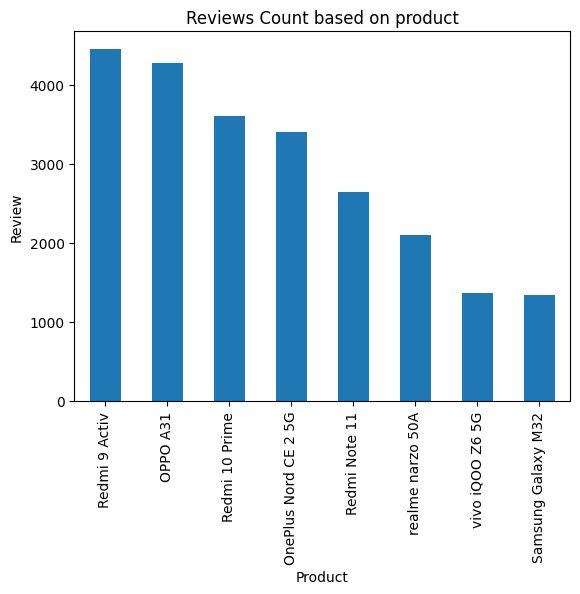

In [9]:
df.value_counts('Product').plot(kind='bar', title='Reviews Count based on product', xlabel='Product', ylabel='Review')
plt.show()

# Average rating for each Product

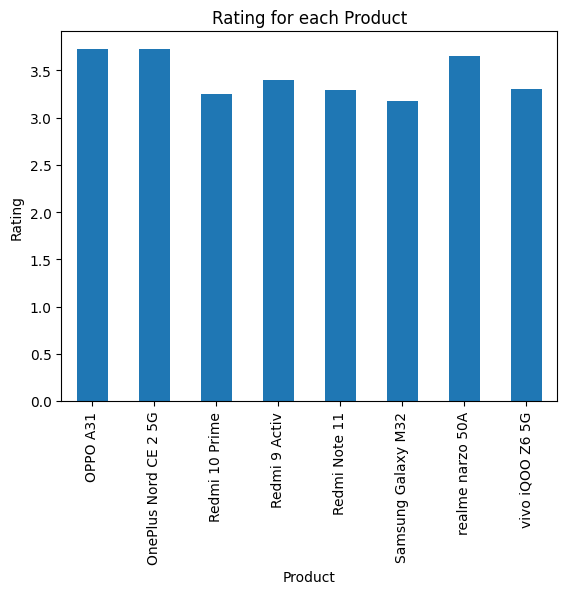

In [12]:
df.groupby('Product')['Ratings'].mean().plot(kind='bar', title='Rating for each Product', xlabel='Product', ylabel='Rating')
plt.show()